# ***AIN 313 - Assignment 1***

### ***Instructor:*** Erkut Erdem
### ***Assistant:*** Sibel Kapan
### ***Topic:*** k-Nearest Neighbor
### ***Subject:*** Disease Detection on X-Ray Images
### ***Student Info:*** Can Ali Ateş
### ***Student ID:*** 2200765002

# ***PART I - Theory Questions***


## ***k-Nearest Neighbor Classification Questions***

![Question1](https://drive.google.com/uc?id=1VwvzpUNDQH9m_GEXaHai_J7bA5RnpZ-m)

### ***Answer 1*** :
### Large training dataset degrades the algorithm performance and  requires more memory during distance calculation stage because the algorithm has to calculate the distance of each new data point to existing points, so cost will huge. As a result, large training dataset makes algorithm slower and need much memory so it's a disadvantage.

<br>

![Question2](https://drive.google.com/uc?id=1c0H3KwhJB9_MK_KHXzbbj0ghzMNg2Jpl)

<br>

### ***Answer 2.1*** :
![Answer1](https://drive.google.com/uc?id=1kRQLOzgxHf2sAoWXnIU7TuUDIUPSyqts)

<br>

### ***Answer 2.2*** :
### The algorithm calculates the distances between unknown point and existing points based on a distance metric such as euclidean, then classifies unknown point by the value of the point with the lowest distance value. 
### According to question, (2,4) and (3,3) points will have the lowest distance but both of these points has positive value so it will not affect the unknown point sign. As a result, the closest point to unknown point will have positive sign so unknown point is going to classify as positive.

<br>

### ***Answer 2.3*** :
### k = 1 ---> (2,4) or (3,3) ---> Positive
### k = 2 ---> (2,4) and (3,3) ---> Positive
### k = 3 ---> (1,4), (2,4) and (3,3) ---> Positive
### k = 4 ---> (1,1) or (3,1), (1,4), (2,4) and (3,3) ---> Unknown
### k = 5 ---> (1,1), (3,1), (1,4), (2,4) and (3,3) ---> Negative
### Based on the different k-values, the minimum k-value required to classify the unknown point as negative is 5.

<br>

### ***Answer 2.4*** :
### Small value of k gives a high impact chance to noise. When the noise is close to unknown point and k is too small, noise will affect the classification easily so classification is going to wrong. Model could be overfitted when k is too small.
### Large value of k decreases the performance of algorithm because when k is too large the algorithm has to do a lot of distance calculations so computational cost will increase. Model could be underfitted when k is too large.

<br>

## ***Linear Regression Questions***

![Question3](https://drive.google.com/uc?id=11Oskt_rEgnu4Z2AwKMiDEiZ9Z7b64ngV)

<br>

### ***Answer 1*** :
### $MSE = \frac{1}{n}\sum_{i=1}^n (y_i - ŷ_i)^2$
### $E_1 = (1.6 - (0.5 * 1.0 + 1.0))^2 = 0.01$
### $E_2 = (1.5 - (0.5 * 1.5 + 1.0))^2 = 0.0625$
### $E_3 = (2.4 - (0.5 * 3.0 + 1.0))^2 = 0.01$
### $MSE = \frac{(0.01 + 0.0625 + 0.01)}{3} = \frac{0.0825}{3} = 0.0275$

<br>

![Question4](https://drive.google.com/uc?id=1lm2e0EsWpnF3rn_Phl89fIkwTjdDM2ND)

<br>

### ***Answer 2*** :
### $θ$ is Parameter Vector with 4x1 dimension.
### $X$ is Input Sequence with 14x4 dimension.
### $Y$ is Measured Values with 14x1 dimension.

<br>

![Question5](https://drive.google.com/uc?id=1m9l6OmwhxNvuU2Nm1LsQerl6Z3Gy0vK9)

<br>

### ***Answer 3*** :
### $x^{(7)}_2$ means 7th row 2nd column record so the value is 2916
### $529 \le x_2\le 8464$ so the range is 7935
### $\overline{x_2} = \frac{5625 + 1849 + 8464 + 529 + 4225 + 7396 + 2916}{7} = 4429,14$
### $x^{(7)}_2 = \frac{x^{(7)}_2 - \overline{x_2}}{Range(x_2)} = \frac{2916 - 4429,14}{7935} = -0.190$
### Normalized value of $x^{(7)}_2$ equals to $-0.190$

# ***PART II - Disease Detection from X-Ray Images***

### ***Upload Dataset***

In [ ]:
# Update G-Down to avoid possible errors.
!pip install --upgrade --no-cache-dir gdown

# Download the dataset from Google Drive to Google Colab.
!gdown --id 18GFlfav8wCmuX3r0Y_BEH5imWIEK7OQT

# Extract zip files.
!unzip "chest_xray.zip" 

### ***Import Necessary Libraries***

In [ ]:
# Import libraries.
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.metrics import confusion_matrix

### ***Read Images and Extract Features***

In [ ]:
def dataset_initializer(dataset_type, image_size):
  
  # Create a list to store features of images.
  dataset = list()

  # Iterate over each image.
  for folder in os.listdir(f"chest_xray/{dataset_type}"):
    for file in os.listdir(f"chest_xray/{dataset_type}/{folder}"):

      # Read image as grayscale.
      image = cv2.imread(f"chest_xray/{dataset_type}/{folder}/{file}", 0)

      # Resize image to NxN dimensions.
      image = cv2.resize(image, (image_size, image_size))

      # Blur the image for noise cancellation.
      blurred_image = cv2.GaussianBlur(image, (3, 3), 0)

      # Apply threshold for noise cancellation.
      _, lung_threshold = cv2.threshold(blurred_image, 50, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
      
      # Create 1D array from threshold pixels of image. [FEATURE EXTRACTED]
      threshold_feature = lung_threshold.flatten()

      # Detect lungs in image with Canny Edge Detection.
      lung_edges = cv2.Canny(blurred_image, 50, 150)

      # Create 1D array from edge detected pixels of image. [FEATURE EXTRACTED]
      canny_feature = lung_edges.flatten()

      # Create a Gabor Kernel.
      gabor_kernel = cv2.getGaborKernel((10, 10), 8.0, np.pi/2, np.pi/4, 0.5, 0.8, ktype=cv2.CV_32F)

      # Detect lungs in image with applying Gabor Filter.
      filtered_img = cv2.filter2D(blurred_image, cv2.CV_8UC3, gabor_kernel)

      # Create 1D array from lung detected pixels of image. [FEATURE EXTRACTED]
      gabor_feature = filtered_img.flatten()
      
      # Create a record with extracted features and label.
      data = [threshold_feature, canny_feature, gabor_feature, file.split("-")[0]]

      # Add record to dataset list.
      dataset.append(data)

  # Return dataset.
  return dataset

### ***Implement Euclidean Distance Algorithm***

In [ ]:
def euclidean_distance(x_train, test_point):
  
  # Create a list to store distances between test point and train points.
  distances = list()

  # Iteate over the train points.
  for row_index in x_train.index:
      
      # Initialize distance between train and test point to 0.
      current_distance = 0

      # Subtract the features from each other.
      threshold_distance =  np.subtract(x_train["Threshold_Pixels"][row_index], test_point["Threshold_Pixels"])
      canny_distance = np.subtract(x_train["Canny_Pixels"][row_index], test_point["Canny_Pixels"])
      gabor_distance = np.subtract(x_train["Gabor_Pixels"][row_index], test_point["Gabor_Pixels"])

      # Calculate square of subtracted features.
      threshold_square = np.square(threshold_distance)
      canny_square = np.square(canny_distance)
      gabor_square = np.square(gabor_distance)

      # Sum the squared difference of each feature.
      current_distance = np.sum(threshold_square) + np.sum(canny_square) + np.sum(gabor_square)

      # Calculate the square root of current distance to find the Euclidean Distance.
      euclidean_distance = np.sqrt(current_distance)

      # Add distance between train point and test point to distances list.
      distances.append(euclidean_distance)

  # Create a distance dataframe from the calculated distances.
  distances = pd.DataFrame(distances, columns = ["Distance"])
  
  # Sort distances according to euclidean distance value.
  distances = distances.sort_values(by = ["Distance"], axis = 0)

  # Return the distances dataframe sorted in ascending order.
  return distances

### ***Implement k-NN Algorithm***

In [ ]:
def nearest_neighbors(x_train, y_train, test_point, K):
  
  # Determine nearest K neighbor points according to calculated distances.
  nearest_distances = euclidean_distance(x_train, test_point)[:K]

  # Count the disease types in nearest neighbors.
  most_voted = Counter(y_train[nearest_distances.index])

  # Predict the test point according to most voted disease type.
  y_pred = most_voted.most_common()[0][0]

  # Return the prediction result.
  return y_pred

### ***Implement Weighted k-NN Algorithm***

In [ ]:
def weighted_nearest_neighbors(x_train, y_train, test_point, K):
  
  # Determine nearest K neighbor points according to calculated distances.
  nearest_distances = euclidean_distance(x_train, test_point)[:K]

  # Convert distances to determine weights of each distance.
  nearest_distances = 1/nearest_distances 
 
  # Create a dict to store total weights of each disease type.
  weights = dict()
  
  # Calculate total weight of each possible label. 
  for index in nearest_distances.index.values:
    if weights.get(y_train[index]) != None:
        weights[y_train[index]] += nearest_distances["Distance"][index]
    else:
      weights[y_train[index]] = nearest_distances["Distance"][index]

  # Find maximum weighted label.
  max_weighted = max(weights, key = weights.get)

  # Return prediction label.
  return max_weighted

### ***Implement Confusion Matrix Visualizer Algorithm***

In [ ]:
def confusion_matrix_visualizer(matrix_1, matrix_2, matrix_3):

  # Plot confusion matrix of k = 3.
  plt.figure(figsize=(25, 7))
  plt.subplot(1,3,1)
  sns.heatmap(matrix_1, annot=True)
  plt.title('Confusion Matrix of k = 3')
  plt.ylabel('ActUal Values')
  plt.xlabel('Predicted Values')

  # Plot confusion matrix of k = 5.
  plt.subplot(1,3,2)
  sns.heatmap(matrix_2, annot=True)
  plt.title('Confusion Matrix of k = 5')
  plt.ylabel('ActUal Values')
  plt.xlabel('Predicted Values')

  # Plot confusion matrix of k = 7.
  plt.subplot(1,3,3)
  sns.heatmap(matrix_3, annot=True)
  plt.title('Confusion Matrix of k = 7')
  plt.ylabel('ActUal Values')
  plt.xlabel('Predicted Values')

  # Display the plots.
  plt.show()

### ***Implement Model Performance Algorithm***

In [ ]:
def model_performance(confusion_matrix):

  # Calculate accuracy of each disease type.
  A_covid = (confusion_matrix.iloc[0,0] + confusion_matrix.iloc[1,1] + confusion_matrix.iloc[1,2] + confusion_matrix.iloc[2,1] + confusion_matrix.iloc[2,2]) / confusion_matrix.values.sum()
  A_pneumonia = (confusion_matrix.iloc[1,1] + confusion_matrix.iloc[0,0] + confusion_matrix.iloc[0,2] + confusion_matrix.iloc[2,0] + confusion_matrix.iloc[2,2]) / confusion_matrix.values.sum()
  A_normal = (confusion_matrix.iloc[2,2] + confusion_matrix.iloc[0,0] + confusion_matrix.iloc[0,1] + confusion_matrix.iloc[1,0] + confusion_matrix.iloc[1,1]) / confusion_matrix.values.sum()
  
  # Calculate precision of each disease type.
  P_covid = (confusion_matrix.iloc[0,0]) / sum(confusion_matrix.iloc[:, 0])
  P_pneumonia = (confusion_matrix.iloc[1,1]) / sum(confusion_matrix.iloc[:, 1])
  P_normal = (confusion_matrix.iloc[2,2]) / sum(confusion_matrix.iloc[:, 2])

  # Calculate recall of each disease type.
  R_pneumonia = (confusion_matrix.iloc[1,1]) / sum(confusion_matrix.iloc[1, :])
  R_covid = (confusion_matrix.iloc[0,0]) / sum(confusion_matrix.iloc[0, :])
  R_normal = (confusion_matrix.iloc[2,2]) / sum(confusion_matrix.iloc[2, :])

  # Calculate average precision and recall to find model performance.
  A_AVG = (A_covid + A_pneumonia + A_normal) / 3
  P_AVG = (P_covid + P_pneumonia + P_normal) / 3
  R_AVG = (R_covid + R_pneumonia + R_normal) / 3

  # Print results.
  print(f"Accuracy: {A_AVG}")
  print(f"Precision: {P_AVG}")
  print(f"Recall: {R_AVG}")

### ***32x32 Images***

### ***Create Train & Test DataFrames***

In [ ]:
# Create a train dataframe with 32x32 images.
train_df = pd.DataFrame(dataset_initializer("train", 32), columns=['Threshold_Pixels', "Canny_Pixels", "Gabor_Pixels", 'Disease'])

# Display first 5 record of dataframe.
train_df.head()

,Threshold_Pixels,Canny_Pixels,Gabor_Pixels,Disease
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 27, 43, 40, 28, 15, 0...",pneumonia
1,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[0, 0, 0, 0, 0, 0, 0, 0, 255, 0, 255, 0, 0, 0,...","[124, 128, 133, 135, 111, 70, 45, 21, 13, 22, ...",pneumonia
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255,...","[0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 255, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",pneumonia
3,"[0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 2...","[0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 14, 22, 29, 34...",pneumonia
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 255, 0, 255, 0, 0, 0, 0,...","[13, 18, 34, 58, 70, 71, 65, 53, 48, 50, 52, 5...",pneumonia


In [ ]:
# Create a test dataframe with 32x32 images. 
test_df = pd.DataFrame(dataset_initializer("test", 32), columns=['Threshold_Pixels', "Canny_Pixels", "Gabor_Pixels", 'Disease'])

# Display first 5 record of dataframe.
test_df.head()

,Threshold_Pixels,Canny_Pixels,Gabor_Pixels,Disease
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 255, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 25...","[0, 0, 0, 0, 0, 8, 22, 27, 32, 40, 47, 56, 68,...",pneumonia
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255...","[0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 6, 31, 39, 52, 58, 56...",pneumonia
2,"[0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 2...","[0, 0, 0, 0, 0, 255, 0, 0, 255, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 26, 43, 53, 62, 72, 79, ...",pneumonia
3,"[0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 25...","[0, 255, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 25...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 20, 19, 11,...",pneumonia
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 25...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0...","[72, 61, 30, 3, 1, 12, 18, 20, 24, 21, 11, 16,...",pneumonia


In [ ]:
# Split dataframes as features and labels.
x_train, x_test, y_train, y_test = train_df.iloc[:, :-1], test_df.iloc[:, :-1], train_df.iloc[:, -1], test_df.iloc[:, -1]

### ***Run k-NN Algorithm***

In [ ]:
# Create a list to store prediction of each test point.
y_pred_3 = list()
y_pred_5 = list()
y_pred_7 = list()

# Iterate over test points.
for row_index in x_test.index:
  
  # Predict disease type of each test point according to k value.
  prediction_3 = nearest_neighbors(x_train, y_train, x_test.loc[row_index, :], 3)
  prediction_5 = nearest_neighbors(x_train, y_train, x_test.loc[row_index, :], 5)
  prediction_7 = nearest_neighbors(x_train, y_train, x_test.loc[row_index, :], 7)
  
  # Add each prediction result to the corresponding list.
  y_pred_3.append(prediction_3)
  y_pred_5.append(prediction_5)
  y_pred_7.append(prediction_7)

### ***Create Confusion Matrix of K-NN Algorithm***

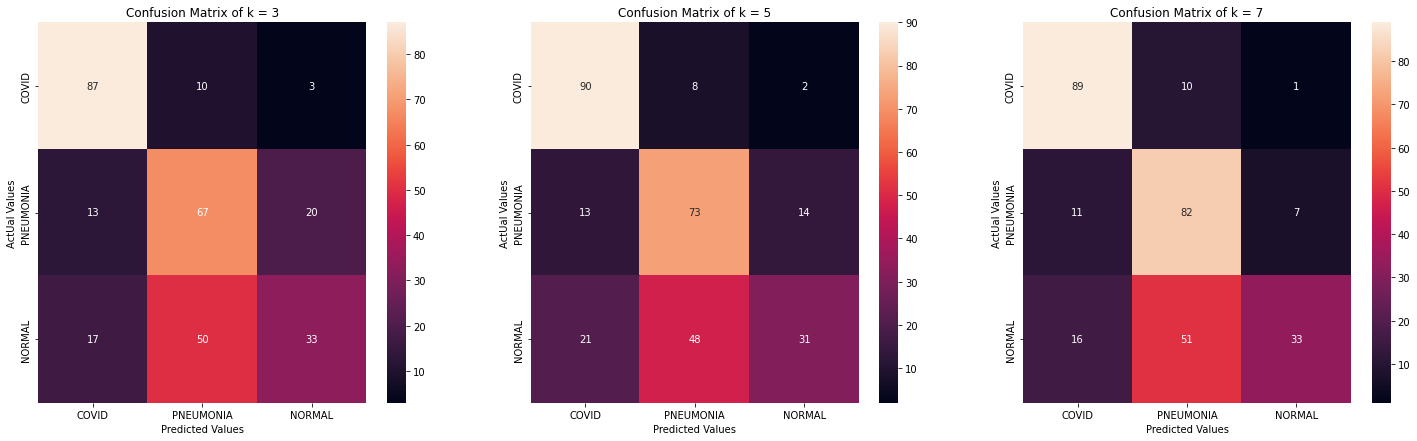

In [ ]:
# Create confusion matrix of each k-nn prediction.
cm_3 = confusion_matrix(y_test, y_pred_3)
cm_5 = confusion_matrix(y_test, y_pred_5)
cm_7 = confusion_matrix(y_test, y_pred_7)

# Create a dataframe to visualize 3x3 confusion matrix.
cm_3_df = pd.DataFrame(cm_3, index = ['COVID','PNEUMONIA', 'NORMAL'], columns = ['COVID','PNEUMONIA','NORMAL'])
cm_5_df = pd.DataFrame(cm_5, index = ['COVID','PNEUMONIA', 'NORMAL'], columns = ['COVID','PNEUMONIA','NORMAL'])
cm_7_df = pd.DataFrame(cm_7, index = ['COVID','PNEUMONIA', 'NORMAL'], columns = ['COVID','PNEUMONIA','NORMAL'])

# Display confusion matrices.
confusion_matrix_visualizer(cm_3_df, cm_5_df, cm_7_df)

###### According to Confusion Matrices of the k-NN Algorithm over different k-values, covid is the most accurately predicted disease among all disease types, and as k increases, the prediction accuracy increases too.

### ***Compute the Performance of K-NN Model***

In [ ]:
# Performance of 3-NN Model.
print("3-NN Model Performance")
model_performance(cm_3_df)

# Performance of 5-NN Model.
print("\n5-NN Model Performance")
model_performance(cm_5_df)

# Performance of 7-NN Model.
print("\n7-NN Model Performance")
model_performance(cm_7_df)

3-NN Model Performance
Accuracy: 0.7488888888888888
Precision: 0.6201448376645228
Recall: 0.6233333333333334

5-NN Model Performance
Accuracy: 0.7644444444444445
Precision: 0.6504241308554088
Recall: 0.6466666666666666

7-NN Model Performance
Accuracy: 0.7866666666666666
Precision: 0.715182000505802
Recall: 0.68


##### According to model performances based on k-value, the model is working better with bigger k values than 3 or 5. Both of the precision and recall measurements are increasing depending on k-value increase.True Prediction rate of model increases depending on k-value according to this experiment.

### ***Run Weighted k-NN Algorithm***

In [ ]:
# Create a list to store prediction of each test point.
y_pred_3 = list()
y_pred_5 = list()
y_pred_7 = list()

# Iterate over test points.
for row_index in x_test.index:
  
  # Predict disease type of each test point according to k value.
  prediction_3 = weighted_nearest_neighbors(x_train, y_train, x_test.loc[row_index, :], 3)
  prediction_5 = weighted_nearest_neighbors(x_train, y_train, x_test.loc[row_index, :], 5)
  prediction_7 = weighted_nearest_neighbors(x_train, y_train, x_test.loc[row_index, :], 7)
  
  # Add each prediction result to the corresponding list.
  y_pred_3.append(prediction_3)
  y_pred_5.append(prediction_5)
  y_pred_7.append(prediction_7)

### ***Create Confusion Matrix of Weighted K-NN Algorithm***

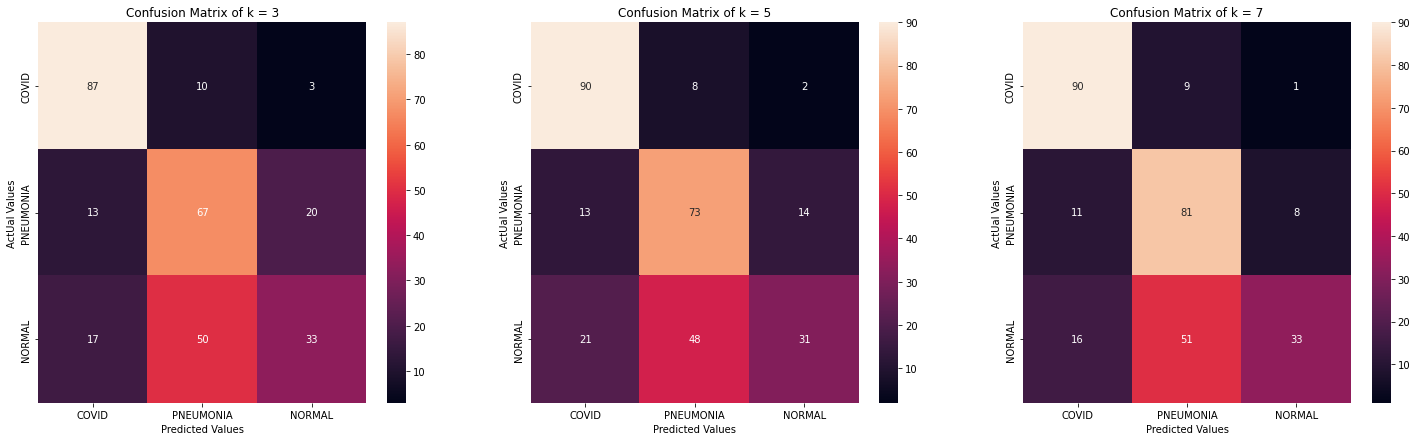

In [ ]:
# Create confusion matrix of each weighted k-nn prediction.
confusion_matrix_3 = confusion_matrix(y_test, y_pred_3)
confusion_matrix_5 = confusion_matrix(y_test, y_pred_5)
confusion_matrix_7 = confusion_matrix(y_test, y_pred_7)

# Create a dataframe to visualize 3x3 confusion matrix.
cm_3_df = pd.DataFrame(confusion_matrix_3, index = ['COVID','PNEUMONIA', 'NORMAL'], columns = ['COVID','PNEUMONIA','NORMAL'])
cm_5_df = pd.DataFrame(confusion_matrix_5, index = ['COVID','PNEUMONIA', 'NORMAL'], columns = ['COVID','PNEUMONIA','NORMAL'])
cm_7_df = pd.DataFrame(confusion_matrix_7, index = ['COVID','PNEUMONIA', 'NORMAL'], columns = ['COVID','PNEUMONIA','NORMAL'])

# Display confusion matrices.
confusion_matrix_visualizer(cm_3_df, cm_5_df, cm_7_df)

##### Confusion Matrices of model depending on different k-values shows us Covid is the most predictable disease for this experiment. Prediction rate of model increases depending on k-value increase.

### ***Compute the Performance of Weighted K-NN Algorithm***

In [ ]:
# Performance of weighted 3-NN Model.
print("3-NN Model Performance")
model_performance(cm_3_df)

# Performance of weighted 5-NN Model.
print("\n5-NN Model Performance")
model_performance(cm_5_df)

# Performance of weighted 7-NN Model.
print("\n7-NN Model Performance")
model_performance(cm_7_df)

3-NN Model Performance
Accuracy: 0.7488888888888888
Precision: 0.6201448376645228
Recall: 0.6233333333333334

5-NN Model Performance
Accuracy: 0.7644444444444445
Precision: 0.6504241308554088
Recall: 0.6466666666666666

7-NN Model Performance
Accuracy: 0.7866666666666666
Precision: 0.709804380017146
Recall: 0.68


##### Performance outputs of model shows us bigger k-value give more accurate prediction performance for this experiment. As shows up in the output, model make more true prediction in 7-nearest neighbor according to total weights.

### ***64x64 Images***

### ***Create Train & Test DataFrames***

In [ ]:
# Create a train dataframe with 64x64 images.
train_df = pd.DataFrame(dataset_initializer("train", 64), columns=['Threshold_Pixels', "Canny_Pixels", "Gabor_Pixels", 'Disease'])

# Display first 5 record of dataframe.
train_df.head()

,Threshold_Pixels,Canny_Pixels,Gabor_Pixels,Disease
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, ...","[186, 154, 114, 105, 100, 84, 54, 28, 0, 0, 0,...",pneumonia
1,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[0, 0, 0, 0, 255, 0, 0, 255, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",pneumonia
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 255, 0, 0, 0, 0, 0, 255, 0, 255, 0, 255...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 32, 57, 7...",pneumonia
3,"[0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255,...","[0, 0, 0, 255, 0, 0, 0, 255, 0, 0, 255, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",pneumonia
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[14, 11, 11, 21, 26, 21, 13, 7, 9, 13, 0, 0, 0...",pneumonia


In [ ]:
# Create a test dataframe with 64x64 images. 
test_df = pd.DataFrame(dataset_initializer("test", 64), columns=['Threshold_Pixels', "Canny_Pixels", "Gabor_Pixels", 'Disease'])

# Display first 5 record of dataframe.
test_df.head()

,Threshold_Pixels,Canny_Pixels,Gabor_Pixels,Disease
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[14, 16, 17, 14, 11, 7, 4, 1, 0, 0, 0, 4, 7, 1...",pneumonia
1,"[0, 0, 0, 0, 0, 255, 255, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 255, 0, 0, 255, 0, 0, 0, 0, 0, 0,...","[62, 68, 72, 71, 59, 37, 18, 0, 0, 0, 0, 0, 0,...",pneumonia
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 4, 9, 15, 20, 23, 18, 16...",pneumonia
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 2, 13, 22, 26, 22, 13, 11, ...",pneumonia
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",pneumonia


In [ ]:
# Split dataframes as features and labels.
x_train, x_test, y_train, y_test = train_df.iloc[:, :-1], test_df.iloc[:, :-1], train_df.iloc[:, -1], test_df.iloc[:, -1]

### ***Run k-NN Algorithm***

In [ ]:
# Create a list to store prediction of each test point.
y_pred_3 = list()
y_pred_5 = list()
y_pred_7 = list()

# Iterate over test points.
for row_index in x_test.index:
  
  # Predict disease type of each test point according to k value.
  prediction_3 = nearest_neighbors(x_train, y_train, x_test.loc[row_index, :], 3)
  prediction_5 = nearest_neighbors(x_train, y_train, x_test.loc[row_index, :], 5)
  prediction_7 = nearest_neighbors(x_train, y_train, x_test.loc[row_index, :], 7)
  
  # Add each prediction result to the corresponding list.
  y_pred_3.append(prediction_3)
  y_pred_5.append(prediction_5)
  y_pred_7.append(prediction_7)

### ***Create Confusion Matrix of K-NN Algorithm***

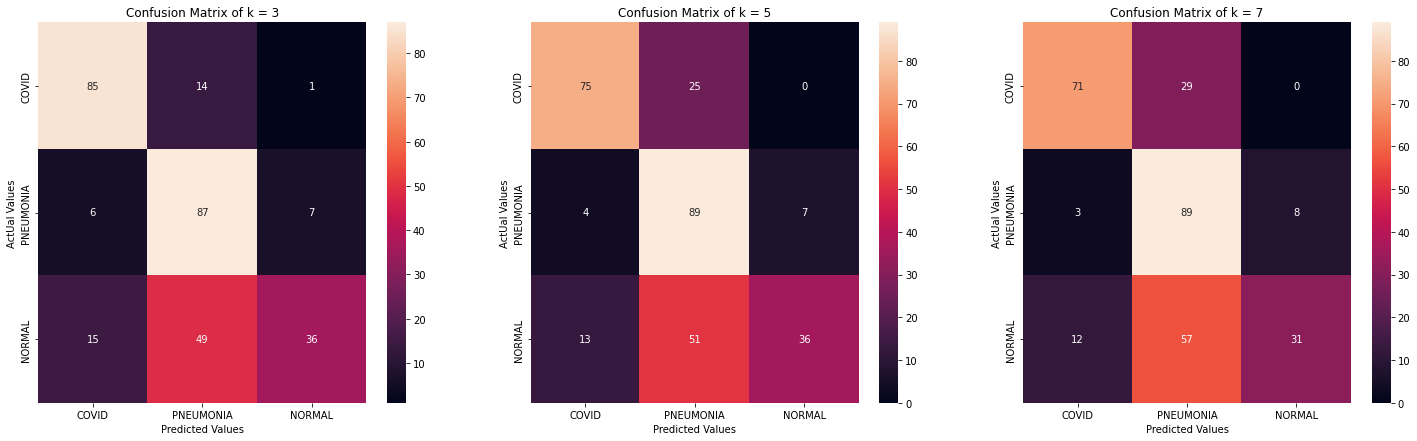

In [ ]:
# Create confusion matrix of each k-nn prediction.
cm_3 = confusion_matrix(y_test, y_pred_3)
cm_5 = confusion_matrix(y_test, y_pred_5)
cm_7 = confusion_matrix(y_test, y_pred_7)

# Create a dataframe to visualize 3x3 confusion matrix.
cm_3_df = pd.DataFrame(cm_3, index = ['COVID','PNEUMONIA', 'NORMAL'], columns = ['COVID','PNEUMONIA','NORMAL'])
cm_5_df = pd.DataFrame(cm_5, index = ['COVID','PNEUMONIA', 'NORMAL'], columns = ['COVID','PNEUMONIA','NORMAL'])
cm_7_df = pd.DataFrame(cm_7, index = ['COVID','PNEUMONIA', 'NORMAL'], columns = ['COVID','PNEUMONIA','NORMAL'])

# Display confusion matrices.
confusion_matrix_visualizer(cm_3_df, cm_5_df, cm_7_df)

##### According to Confusion Matrices of model, Pneumonia is the most predictable disease type. Depending on k-value prediction rate of covid and normal people decreases so bigger k-value decreases the model performance. Accuracy of model decreases according to bigger k-value, it shows us smaller k-values gives better true prediction rate for this experiment.

### ***Compute the Performance of K-NN Model***

In [ ]:
# Performance of 3-NN Model.
print("3-NN Model Performance")
model_performance(cm_3_df)

# Performance of 5-NN Model.
print("\n5-NN Model Performance")
model_performance(cm_5_df)

# Performance of 7-NN Model.
print("\n7-NN Model Performance")
model_performance(cm_7_df)

3-NN Model Performance
Accuracy: 0.7955555555555556
Precision: 0.7333562035448828
Recall: 0.6933333333333334

5-NN Model Performance
Accuracy: 0.7777777777777777
Precision: 0.730606877674623
Recall: 0.6666666666666666

7-NN Model Performance
Accuracy: 0.7577777777777778
Precision: 0.7096748729306869
Recall: 0.6366666666666667


##### Model Performance decreased as expected for bigger k-values. This shows us to use smaller k is better for this experiment.

### ***Run Weighted k-NN Algorithm***

In [ ]:
# Create a list to store prediction of each test point.
y_pred_3 = list()
y_pred_5 = list()
y_pred_7 = list()

# Iterate over test points.
for row_index in x_test.index:
  
  # Predict disease type of each test point according to k value.
  prediction_3 = weighted_nearest_neighbors(x_train, y_train, x_test.loc[row_index, :], 3)
  prediction_5 = weighted_nearest_neighbors(x_train, y_train, x_test.loc[row_index, :], 5)
  prediction_7 = weighted_nearest_neighbors(x_train, y_train, x_test.loc[row_index, :], 7)
  
  # Add each prediction result to the corresponding list.
  y_pred_3.append(prediction_3)
  y_pred_5.append(prediction_5)
  y_pred_7.append(prediction_7)

### ***Create Confusion Matrix of Weighted K-NN Algorithm***

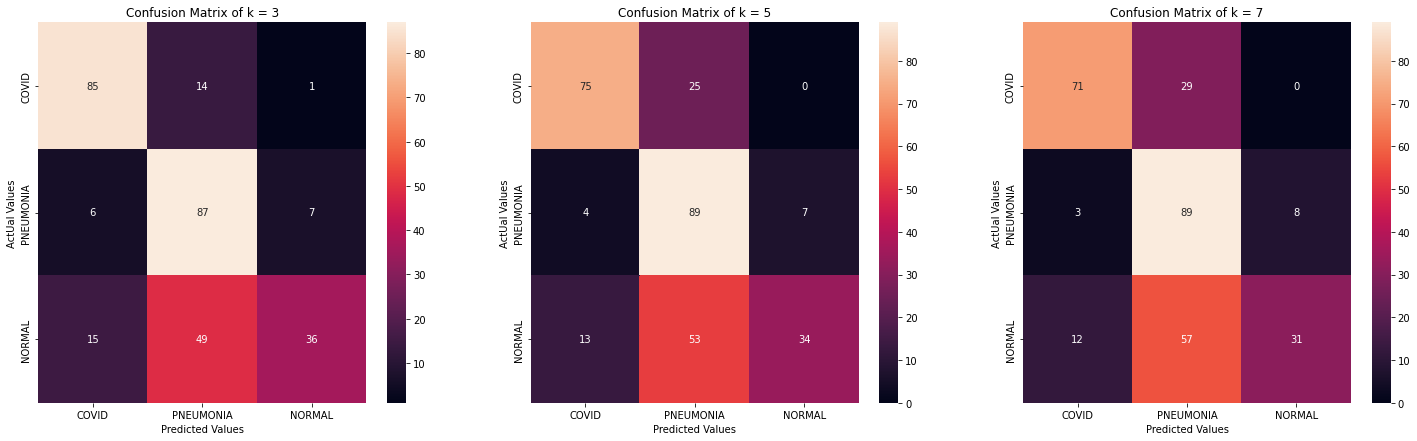

In [ ]:
# Create confusion matrix of each weighted k-nn prediction.
confusion_matrix_3 = confusion_matrix(y_test, y_pred_3)
confusion_matrix_5 = confusion_matrix(y_test, y_pred_5)
confusion_matrix_7 = confusion_matrix(y_test, y_pred_7)

# Create a dataframe to visualize 3x3 confusion matrix.
cm_3_df = pd.DataFrame(confusion_matrix_3, index = ['COVID','PNEUMONIA', 'NORMAL'], columns = ['COVID','PNEUMONIA','NORMAL'])
cm_5_df = pd.DataFrame(confusion_matrix_5, index = ['COVID','PNEUMONIA', 'NORMAL'], columns = ['COVID','PNEUMONIA','NORMAL'])
cm_7_df = pd.DataFrame(confusion_matrix_7, index = ['COVID','PNEUMONIA', 'NORMAL'], columns = ['COVID','PNEUMONIA','NORMAL'])

# Display confusion matrices.
confusion_matrix_visualizer(cm_3_df, cm_5_df, cm_7_df)

##### According to Confusion Matrices, Pneumonia is the most predictable disease type with weights. Increase on k-value decreases the prediction performance of model so for this experiment smaller k-values is more suitable.

### ***Compute the Performance of Weighted K-NN Algorithm***

In [ ]:
# Performance of weighted 3-NN Model.
print("3-NN Model Performance")
model_performance(cm_3_df)

# Performance of weighted 5-NN Model.
print("\n5-NN Model Performance")
model_performance(cm_5_df)

# Performance of weighted 7-NN Model.
print("\n7-NN Model Performance")
model_performance(cm_7_df)

3-NN Model Performance
Accuracy: 0.7955555555555556
Precision: 0.7333562035448828
Recall: 0.6933333333333334

5-NN Model Performance
Accuracy: 0.7733333333333334
Precision: 0.7258066052412672
Recall: 0.66

7-NN Model Performance
Accuracy: 0.7577777777777778
Precision: 0.7096748729306869
Recall: 0.6366666666666667


##### Based on model performance, bigger k-value is not suitable for weighted k-nn algorithm on 64x64 images. We need to use smaller k-value to get better result. Accuracy of model decreased because of k-value. Smaller k-values is more suitable for this experiment.

### ***Error Analysis***

#### ***Misestimated Images***

#### When I investigate the images, some of the images has very big noise. Cables, texts, colored logos etc. are noise for the x-ray images.

<br>

#### There can be two or more most voted neighbor type. In this situation, different classes has same count of participants in the k-nearest neighbors.
* k = 3 means the class of test point will determine by three nearest point.
  * Covid - Pneumonia - Normal 

  can be possible neighbor pair on decision mechanism, each class has only 1 member in the nearest neighbor circle so the algorithm can't decide one of these classes.
    
* k = 5 means the class of test point will determine by five nearest point. 
  * Covid(2) - Pneumonia(2) - Normal, 
  * Covid(2) - Pneumonia - Normal(2), 
  * Covid - Pneumonia(2) - Normal(2) 
  
  can be possible neighbor pairs on decision mechanism, there is 2 most voted class in neighbor circle so the algorithm can't decide one of these classes.

<br> 

#### Weights of neighbor types can be equal. Give a weight to nearest neighbors distances then calculate total weight of each nearest neighbor class can be solution for first problem. In this situation there can be two or three class with same total weight.

* Consider k = 2, two nearest points are Covid and Pneumonia. Algorithm calculates the distances of each point, then both of distances are same so each point will have same weight. As a result, the system can't classify the test point correctly.

* Consider k = 3, three nearest points are Covid, Pneumonia and Pneumonia. The k-NN can classify the point as Pneumonia but when the Weighted k-NN Algorithm calculates weights of each class, weights of classes can be equal so Algorithm will stuck.

<br>

Because of all these reasons, estimation of disease from X-Ray Image getting harder.

<br>

#### ***Comparison of Performance***

##### ***1. Effect of Image Size***

###### Large images have more pixels than small images so require more memory and distance calculations. These requirements slow down the algorithm and make memory inefficient. Despite all these disadvantages, it mostly provides higher prediction accuracy.

<br>

##### ***2. Effect of Gaussian Blur***
###### As mentioned in error analysis part, some of the images have certain noises. Gaussian Blur partially helps to get rid of from these noises and focusing the algorithm to lungs.

<br>

##### ***3. Effect of Threshold Feature***

###### I observed the effect of threshold on the prediction accuracy of the algorithm in my experiments where the threshold property was evaluated as argument, canny, and gabor held constant. The threshold property decreases the model accuracy except k = 5 situations for both of the 32x32 and 64x64 image sizes, so use of this feature is not good for make successful predictions on disease detection from x-ray images.

<br>

##### ***4. Effect of Canny Feature***

##### Canny was a fixed feature for my experience because as per the requirements I needed to use 2 fixed features. So, I observed the experiments using only canny but I did not add the result of the experiments to my result table. According to this experiments, canny works on large image sizes much better than smaller images and 50 - 150 gray color range is the better for x-ray images. In my opinion, reason of this situation is edges are more clear on large images with specified color range so the canny detect edges very well and create a more reliable feature set.

<br>

##### ***5. Effect of Gabor Feature***

##### Gabor was a fixed feature for my experience because as per the requirements I needed to use 2 fixed features. So, I observed the experiments using only gabor but I did not add the result of the experiments to my result table. I used different filter sizes, gamma values, sigma values or psi values, but generally the gabor reduced algorithm accuracy without depending on image size. I think it is about viewing angles and noise because when I research images some images are really smooth and noise free but some have wires, text etc. Maybe Gabor is easily affected by these noises, reducing the prediction rate of the model.

<br>

##### ***6. Effect of k-Value***

##### k value is a critical parameter for k-NN and Weighted K-NN because has a directly effect on decision mechanism. In the experiment we observe different effect of k value on different image sizes. The k-value for both of k-NN and Weighted K-NN Algorithms increases the accuracy of model for smaller images which dimensions are 32x32, but decreases the accuracy of model for bigger images which dimensions are 64x64. When we investigate models one by one with observing different k-values, depending on the increase of k-value computation time of all models increase. So, while we decide on optimal k-value for best model we have to consider the size of image and computation time.

<br>

##### ***7. Effect of Algorithm***
###### Most of the experiments k-NN and Weighted k-NN gives the same result for the experiment but for some of the experiments, Weighted k-NN slightly accurate than k-NN. If we consider all experiments algorithmic time of k-NN much faster than Weighted k-NN. As a result, we have to arrange time - performance to optimal for getting better and faster results.


# BONUS PART - Deep Image Features


In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.autograd import Variable
from PIL import Image

# Function to extract features with ResNet-18 with images.
def resnet_feature_extractor(dataset_type):

  # Load the pretrained model.
  model = models.resnet18(pretrained=True)

  # Use the model object to select the desired layer.
  layer = model._modules.get('avgpool')

  # Set model to evaluation mode.
  model.eval()

  # Image transforms.
  scaler = transforms.Resize((224, 224))
  normalize = transforms.Normalize((0.5), (0.5))
  to_tensor = transforms.ToTensor()

  # Create a list to hold features of images.
  dataset = list()

  # Iterate over each image.
  for folder in os.listdir(f"chest_xray/{dataset_type}"):
    for file in os.listdir(f"chest_xray/{dataset_type}/{folder}"):

      # Load the image with Pillow library.
      img = Image.open(f"chest_xray/{dataset_type}/{folder}/{file}")

      # Create a PyTorch Variable with the transformed image.
      t_img = Variable(normalize(to_tensor(scaler(img))).unsqueeze(0))

      # Check tensor image suitability for model.
      if t_img.shape[1] == 1:
        t_img = t_img.repeat(1,3,1,1)
      elif t_img.shape[1] != 3:
        continue
      
      # Create a vector of zeros that will hold our feature vector.
      # The 'avgpool' layer has an output size of 512.
      my_embedding = torch.zeros(512)

      # Define a function that will copy the output of a layer.
      def copy_data(m, i, o):
        my_embedding.copy_(o.data.reshape(o.data.size(1)))

      # Attach that function to our selected layer.
      h = layer.register_forward_hook(copy_data)

      # Run the model on our transformed image.
      model(t_img)

      # Detach our copy function from the layer.
      h.remove()

      # Add image and feature vector of it to list.
      dataset.append([file, my_embedding.numpy()])
  
  # Return dataset which contain features of images.
  return dataset

In [ ]:
# Create a dataframe with features of train images which extracted with ResNet18.
train_features = pd.DataFrame(resnet_feature_extractor("train"), columns=['Image', "ResNet-18 Feature"])

# Show first 5 record of dataframe.
train_features.head()

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


,Image,ResNet-18 Feature
0,pneumonia-74.jpg,"[0.5350552, 0.0, 0.20110124, 3.5082068, 2.1356..."
1,pneumonia-741.jpg,"[0.62585497, 0.00085987325, 0.6378979, 4.55018..."
2,pneumonia-887.jpg,"[0.765121, 0.017880442, 0.18204749, 1.7201076,..."
3,pneumonia-150.jpg,"[0.84387636, 0.006948875, 0.26549533, 1.111751..."
4,pneumonia-8.jpg,"[1.4989121, 0.34509268, 0.92015505, 3.217792, ..."


In [ ]:
# Create a dataframe with features of test images which extracted with ResNet18.
test_features = pd.DataFrame(resnet_feature_extractor("test"), columns=['Image', "ResNet-18 Feature"])

# Show first 5 record of dataframe.
test_features.head()

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


,Image,ResNet-18 Feature
0,pneumonia-74.jpg,"[0.52738106, 0.0, 0.02759915, 2.118395, 1.5295..."
1,pneumonia-8.jpg,"[0.55987614, 0.0010383796, 0.28360885, 2.57860..."
2,pneumonia-91.jpg,"[0.7248247, 0.064688385, 0.21852027, 2.6654415..."
3,pneumonia-82.jpg,"[0.26749697, 0.0034124535, 0.45393726, 1.62251..."
4,pneumonia-100.jpg,"[0.5303189, 0.016148955, 0.15523246, 3.4639742..."


# ***REPORT***


## ***Overview of the Problem***

### Classification of people as covid, pneumonia or normal based on chest X-Ray images using kNN and Weighted kNN algorithms.

<br>

## ***Details of Implemented Solution***

### 1. Upload the dataset to Google Colab from Google Drive, extract train and test files from zip file.
### 2. Read images one by one as gray then resize, extract features with applying Threshold - Canny Edge Detection and Gabor Filter to images. Store all these feature data in dataframe for both of train and test set.
### 3. Split the dataframes into features and labels.
### 4. Calculate distances according to Euclidean distance of feature arrays.
### 5. Predict point with k-NN algorithm according to most voted label in nearest neighbors along different k-values.
### 6. Display confusion matrix of k-NN model according to k-value.
### 7. Compute the performance of k-NN model.
### 8. Predict point with Weighted k-NN algorithm according to total weights of each label which are in nearest neighbors.
### 9. Display confusion matrix of Weighted k-NN model according to k-value.
### 10. Compute the performance of Weighted k-NN model.

<br>

## ***Pseudocodes of Algorithms***

Distance Algorithm Psuedocode
```
def euclidean_distance(x_train, test):
  list ---> []
  for i in x_train:
    distance -> sqrt(square(threshold_i - threshold_test) + square(canny_i - canny_test) + square(gabor_i - gabor_test))
    add distance to list
  list ---> dataframe
  return dataframe
```

<br>

K-NN Algorithm Pseudocode
```
def nearest_neighbors(x_train, y_train, test, K):
  nearest_distances <-- euclidean_distance(x_train, test)
  most_voted <--- COUNTER(y_train[nearest_distances.index])[0 ---> K]
  y_predict = most_voted[0]
  return y_predict
```

<br>

Weighted K-NN Algorithm Pseudocode
```
def weighted_nearest_neighbors(x_train, y_train, test, K):
  nearest_distances <-- euclidean_distance(x_train, test)
  nearest_distances ---> 1/nearest_distances
  weights ---> {}
  for i in y_train:
    weights[key] exists:
      weights[key] += nearest_distances[i]
    not exists:
      weights[key] = nearest_distances[i]
  prediction <--- max(weights)
  return prediction
```

<br>

Confusion Matrix Visualizer Algorithm Pseudocode
```
def confusion_matrix_visualizer(m1, m2, m3):
  m1, m2, m3 are confusion matrixes according to k-value.
  plot m1, m2, m3
```

<br>

Compute Performance Algorithm Pseudocode
```
def model_performance(confusion_matrix):
  calculate accuracy from confusion matrix for each disease.
  calculate precision values from confusion matrix for each disease.
  calculate recall values from confusion matrix for each disease.
  accuracy = (a_covid + a_pneumonia + a_normal)/ 3
  precision = (p_covid + p_pneumonia + p_normal) / 3
  recall = (r_covid + r_pneumonia + r_normal) / 3

  print precision and recall outputs.
```

<br>

## ***Result Tables***

### ***k-NN Algorithm***

![Table1](https://drive.google.com/uc?id=1fLbhGDQAdv-4eFLP3Pc3Tl96xfVnGWbP)

<br>

### ***Weighted k-NN Algorithm***

![Table2](https://drive.google.com/uc?id=1wu6CJzCRXoI1gpJwYL9j5lh1ByHx_CR9)